<a href="https://colab.research.google.com/github/peddojiharshitha/CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Libraries**

In [44]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,mean_absolute_error,mean_squared_error
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading the Dataset**

In [16]:
df=pd.read_csv("/content/drive/MyDrive/TITANIC SURVIVAL PREDICTION/tested.csv")

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# dataset columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df= df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
print (df.head())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  34.5   7.8292        Q
1         1       3  female  47.0   7.0000        S
2         0       2    male  62.0   9.6875        Q
3         0       3    male  27.0   8.6625        S
4         1       3  female  22.0  12.2875        S


In [20]:
df.shape

(418, 6)

In [21]:
df.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,332.000000,417.000000
mean,0.363636,2.265550,30.272590,35.627188
std,0.481622,0.841838,14.181209,55.907576
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,21.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,39.000000,31.500000
max,1.000000,3.000000,76.000000,512.329200


In [25]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
Embarked     0
dtype: int64

# **Cleaning the Dataset**

In [26]:
# printing the data type of each column in this dataset
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object


In [27]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)
print ("The data['Fare'] missing val =\t",df["Fare"].isnull().sum())

The data['Fare'] missing val =	 0


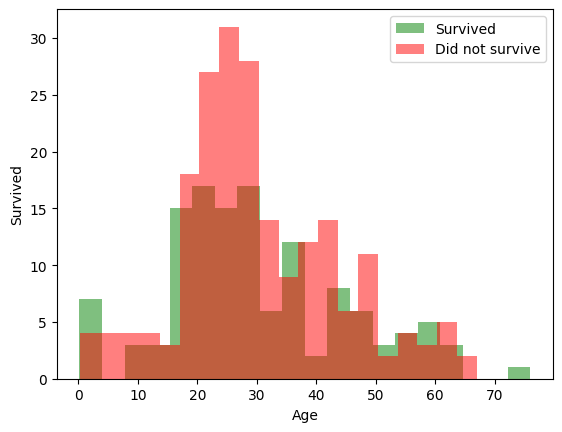

In [28]:
#survived vs not survivedd

x = df['Age']
survived = df['Survived']

plt.hist(x[survived == 1], label='Survived', alpha=0.5, bins=20, color='green')
plt.hist(x[survived == 0], label='Did not survive', alpha=0.5, bins=20, color='red')

plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()

plt.show()

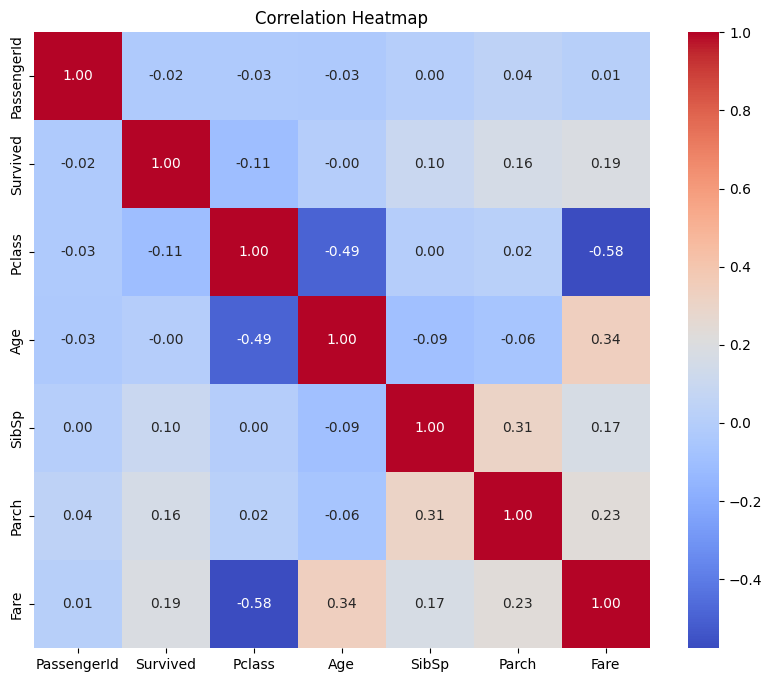

In [34]:
# Select the desired columns from your DataFrame
columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df = data[columns]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the plot title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

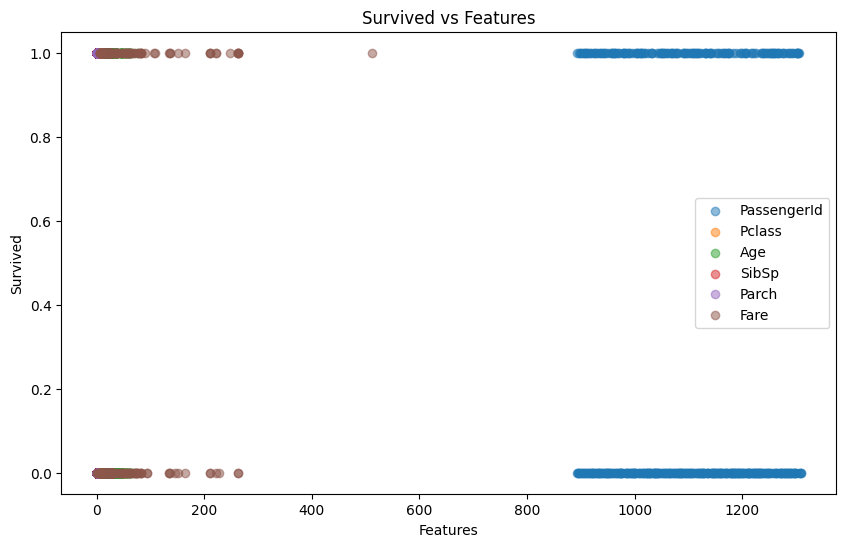

In [37]:
x_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
y_column = 'Survived'

# Plot the graph
plt.figure(figsize=(10, 6))
for col in x_columns:
    plt.scatter(df[col], df[y_column], label=col, alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Survived')
plt.title('Survived vs Features')
plt.legend()
plt.show()



# **Train a Model**

In [38]:
x=df.drop("Survived",axis=1)

In [39]:
y=df["Survived"]

In [40]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [41]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.20)

In [47]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print(lr)

LogisticRegression()


In [50]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [51]:
def prediction_function(Age):
    z = 0.0052784 * Age - 0.02268275
    y = sigmoid(z)
    return y

In [52]:
age=30
prediction_function(age)

0.5338653841625173

In [53]:
age=60
prediction_function(age)

0.5729803152494988

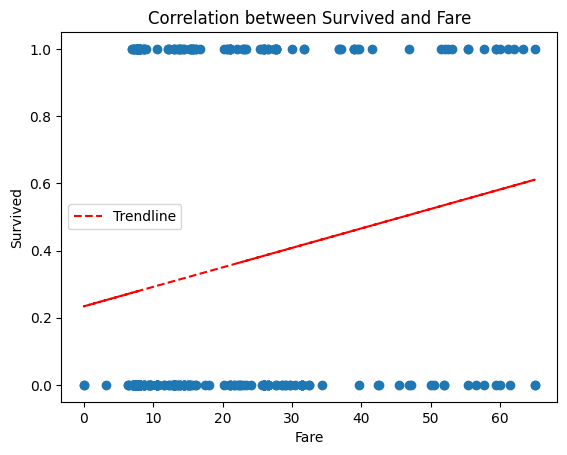

In [58]:
import numpy as np
import matplotlib.pyplot as plt

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Fare column
cleaned_data = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Print the cleaned dataset
#print(cleaned_data)


# Calculate the trendline
fit = np.polyfit(cleaned_data['Fare'], cleaned_data['Survived'], 1)
trendline = np.polyval(fit, cleaned_data['Fare'])

# Plot the scatter plot with trendline
plt.scatter(cleaned_data['Fare'], cleaned_data['Survived'])
plt.plot(cleaned_data['Fare'], trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Fare')
plt.legend()
plt.show()

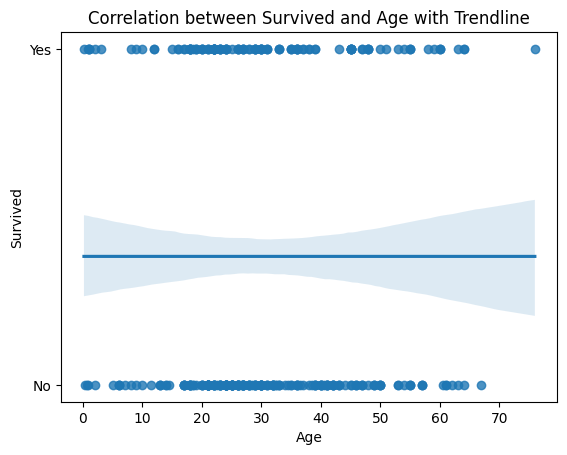

In [57]:
import seaborn as sns

# Assuming 'data' is your DataFrame containing the 'Survived' and 'Age' columns
sns.regplot(x='Age', y='Survived', data=df, scatter=True)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Correlation between Survived and Age with Trendline')
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()